In [1]:
pip install tensorflow keras

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
url = "https://raw.githubusercontent.com/dsrscientist/dataset4/main/Grades.csv"
grade = pd.read_csv(url)
print(grade.head())

   Seat No. PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102 EE-119  \
0  CS-97001     B-     D+     C-         C     C-     D+      D     C-     B-   
1  CS-97002      A      D     D+         D     B-      C      D      A     D+   
2  CS-97003      A      B      A        B-     B+      A     B-     B+     A-   
3  CS-97004      D     C+     D+         D      D     A-     D+     C-      D   
4  CS-97005     A-     A-     A-        B+      A      A     A-     B+      A   

   ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423 CS-412   CGPA  
0  ...     C-     C-     C-     C-     A-      A     C-      B     A-  2.205  
1  ...     D+      D      C      D     A-     B-      C      C      B  2.008  
2  ...      B      B      A      C      A      A      A     A-      A  3.608  
3  ...     D+      C     D+     C-     B-      B     C+     C+     C+  1.906  
4  ...     B-     B+     B+     B-     A-      A     A-     A-      A  3.448  

[5 rows x 43 columns]


In [6]:
# Data Preparation for model building

X = grade.drop('CGPA', axis=1)
y = grade['CGPA']

In [9]:
X_dummy = pd.get_dummies(X, drop_first=True)

In [10]:
X_train, X_val, y_train, y_val = train_test_split(X_dummy, y, test_size=0.25, random_state=123)

In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [12]:
# Model Building

model = Sequential()

model.add(Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

In [13]:
# Model Training

early_stop = EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val),
                    epochs=20, batch_size=32, callbacks=[early_stop], verbose=1)

Epoch 1/20
14/14 [==============================] - 1s 13ms/step - loss: 1.6730 - val_loss: 0.4647
Epoch 2/20
14/14 [==============================] - 0s 4ms/step - loss: 1.1023 - val_loss: 1.2590
Epoch 3/20
14/14 [==============================] - 0s 5ms/step - loss: 0.8939 - val_loss: 1.0827
Epoch 4/20
14/14 [==============================] - 0s 5ms/step - loss: 0.6945 - val_loss: 1.1003
Epoch 5/20
14/14 [==============================] - 0s 5ms/step - loss: 0.5646 - val_loss: 1.1276
Epoch 6/20
14/14 [==============================] - 0s 4ms/step - loss: 0.5701 - val_loss: 1.1483
Epoch 7/20
14/14 [==============================] - 0s 4ms/step - loss: 0.4399 - val_loss: 1.2030
Epoch 8/20
14/14 [==============================] - 0s 5ms/step - loss: 0.4409 - val_loss: 1.0717
Epoch 9/20
14/14 [==============================] - 0s 5ms/step - loss: 0.4273 - val_loss: 1.1499
Epoch 10/20
14/14 [==============================] - 0s 5ms/step - loss: 0.4546 - val_loss: 1.3238
Epoch 11/20
14/14 

In [14]:
y_pred = model.predict(X_val_scaled)

5/5 [==============================] - 0s 2ms/step


In [16]:
r2 = r2_score(y_val, y_pred)
print("R-squared:", r2)

n = X_val_scaled.shape[0]
p = X_val_scaled.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print("Adjusted R-squared:", adjusted_r2)

rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print("RMSE:", rmse)

R-squared: -2.1485097492497798
Adjusted R-squared: 1.4896915491713787
RMSE: 1.0127510725794842


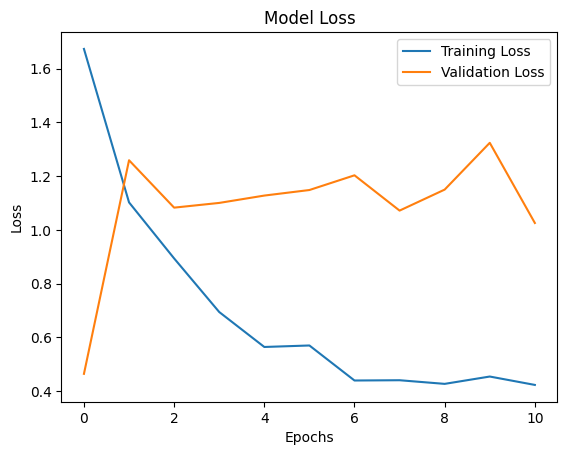

In [19]:
# Plot the training and validation loss over epochs

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()